# CIFAR 10 

Here I will use the CIFAR 10 images to train different convolutional neural networks cocmparing the effects of batch normalization and drop out cells.

In [79]:
import pandas as pd
import numpy as np

Here I upload the necessary dataset and show an example sample

In [80]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [81]:
import matplotlib.pyplot as plt

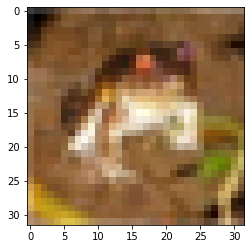

In [82]:
plt.imshow(x_train[0])

In [83]:
#Here I know the sizes of both the training and test data
#have so I am abel to scale both down by 255
x_train = x_train/225
x_test = x_test/255

In [84]:
from tensorflow.keras.utils import to_categorical

In [85]:
#Here I categorize the output labels
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [87]:
x_train.shape

(50000, 32, 32, 3)

## No Dropout No Batch Normalization

In [88]:
#Model with no dropouts nor batch normalization


model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5,5),input_shape=(32, 32, 3), 
                 activation='relu'
                ,data_format='channels_last'))


model.add(Conv2D(filters=16, kernel_size=(10,10),input_shape=(32, 32, 3), 
                 activation='relu',))

#Here I add pooling layers to reduce the information making 
#the further computations easier
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())


model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))


model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [89]:
from tensorflow.keras.callbacks import EarlyStopping

In [90]:
#Here I use an early stop as to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [91]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 46s 916us/sample - loss: 1.6180 - accuracy: 0.4067 - val_loss: 1.5058 - val_accuracy: 0.4680
Epoch 2/15
50000/50000 [==============================] - 45s 903us/sample - loss: 1.3522 - accuracy: 0.5159 - val_loss: 1.2993 - val_accuracy: 0.5297
Epoch 3/15
50000/50000 [==============================] - 45s 908us/sample - loss: 1.2432 - accuracy: 0.5586 - val_loss: 1.3059 - val_accuracy: 0.5407
Epoch 4/15
50000/50000 [==============================] - 46s 911us/sample - loss: 1.1685 - accuracy: 0.5880 - val_loss: 1.2140 - val_accuracy: 0.5676
Epoch 5/15
50000/50000 [==============================] - 46s 921us/sample - loss: 1.1074 - accuracy: 0.6085 - val_loss: 1.2377 - val_accuracy: 0.5591
Epoch 6/15
50000/50000 [==============================] - 45s 907us/sample - loss: 1.0473 - accuracy: 0.6301 - val_loss: 1.2136 - val_accuracy: 0.5695
Epoch 7/15
50000/50000 [====================

Without any noralization nor drop outs my model had an accuracy score of 70% on the training data and 59% on the validation or testing data. This took a total of 7 minutes and 34 seconds.

In [92]:
from tensorflow.keras.layers import Dropout

## One Dropout no Batch Normalization

In [93]:
#Model with one dropout and no batch normalization


model = Sequential()


model.add(Conv2D(filters=6, kernel_size=(5,5),input_shape=(32, 32, 3), 
                 activation='relu'
                ,data_format='channels_last'))


#Drop out layer
model.add(Dropout(0.5))


model.add(Conv2D(filters=16, kernel_size=(10,10),input_shape=(32, 32, 3), 
                 activation='relu',))


model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))


model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [94]:
model.fit(x_train,y_cat_train,epochs=20,validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 47s 933us/sample - loss: 1.6767 - accuracy: 0.3871 - val_loss: 1.5170 - val_accuracy: 0.4522
Epoch 2/20
50000/50000 [==============================] - 47s 932us/sample - loss: 1.4127 - accuracy: 0.4920 - val_loss: 1.4225 - val_accuracy: 0.4922
Epoch 3/20
50000/50000 [==============================] - 50s 1ms/sample - loss: 1.3149 - accuracy: 0.5298 - val_loss: 1.3367 - val_accuracy: 0.5249
Epoch 4/20
50000/50000 [==============================] - 51s 1ms/sample - loss: 1.2539 - accuracy: 0.5517 - val_loss: 1.3277 - val_accuracy: 0.5171
Epoch 5/20
50000/50000 [==============================] - 50s 998us/sample - loss: 1.2003 - accuracy: 0.5729 - val_loss: 1.2566 - val_accuracy: 0.5603
Epoch 6/20
50000/50000 [==============================] - 49s 973us/sample - loss: 1.1633 - accuracy: 0.5874 - val_loss: 1.3896 - val_accuracy: 0.5280
Epoch 7/20
50000/50000 [========================

With the one drop out layer the accuracy on the training data was 67% and on the test/validation data it increased to 57% and took 14 minutes and 5 seconds.

## One Dropout One Batch Normalizer

In [100]:
#Model with one dropout and one batch normalizer
from tensorflow.keras.layers import BatchNormalization

model = Sequential()



model.add(Conv2D(filters=6, kernel_size=(5,5),input_shape=(32, 32, 3), 
                 activation='relu'))



model.add(Dropout(0.5))
#Batch normalizer
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=16, kernel_size=(10,10),input_shape=(32, 32, 3), 
                 activation='relu',))


model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(500, activation='relu'))


model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [101]:
model.fit(x_train,y_cat_train,epochs=20,validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.6184 - accuracy: 0.4174 - val_loss: 1.5390 - val_accuracy: 0.4459
Epoch 2/20
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.3572 - accuracy: 0.5140 - val_loss: 1.3337 - val_accuracy: 0.5190
Epoch 3/20
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.2484 - accuracy: 0.5551 - val_loss: 1.2280 - val_accuracy: 0.5644
Epoch 4/20
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.1848 - accuracy: 0.5791 - val_loss: 1.4618 - val_accuracy: 0.4845
Epoch 5/20
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.1260 - accuracy: 0.6006 - val_loss: 1.2824 - val_accuracy: 0.5486
Epoch 6/20
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.0803 - accuracy: 0.6181 - val_loss: 1.3488 - val_accuracy: 0.5315


With the one drop out layer and the batch normalizer placed before the second layer the accuracy on the training data was 62% and on the test/validation data it increased to 53% and took 6 minutes and 15 seconds.

## Comparison

Interestingly the first model performed the best with an accuracy score on the test/validation data of 59% taking about 7 and a half minutes.